In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
stock_data = pd.read_csv(os.getcwd() + "/Stock_Data/TSLA.csv")

In [7]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# The stochastic oscillator is calculated using the following formula:

%K = 100(C – L14)/(H14 – L14)

Where:

C = the most recent closing price

L14 = the low of the 14 previous trading sessions

H14 = the highest price traded during the same 14-day period

%K= the current market rate for the currency pair

%D = 3-period moving average of %K

In [10]:
stock_data['L14'] = stock_data['Low'].rolling(window=14).min()

In [11]:
stock_data['H14'] = stock_data['High'].rolling(window=14).max()

In [12]:
stock_data['%K'] = 100*((stock_data['Close'] - stock_data['L14']) / (stock_data['H14'] - stock_data['L14']))

In [13]:
stock_data['%D'] = stock_data['%K'].rolling(window=3).mean()

Text(0.5, 1.0, 'Oscillator')

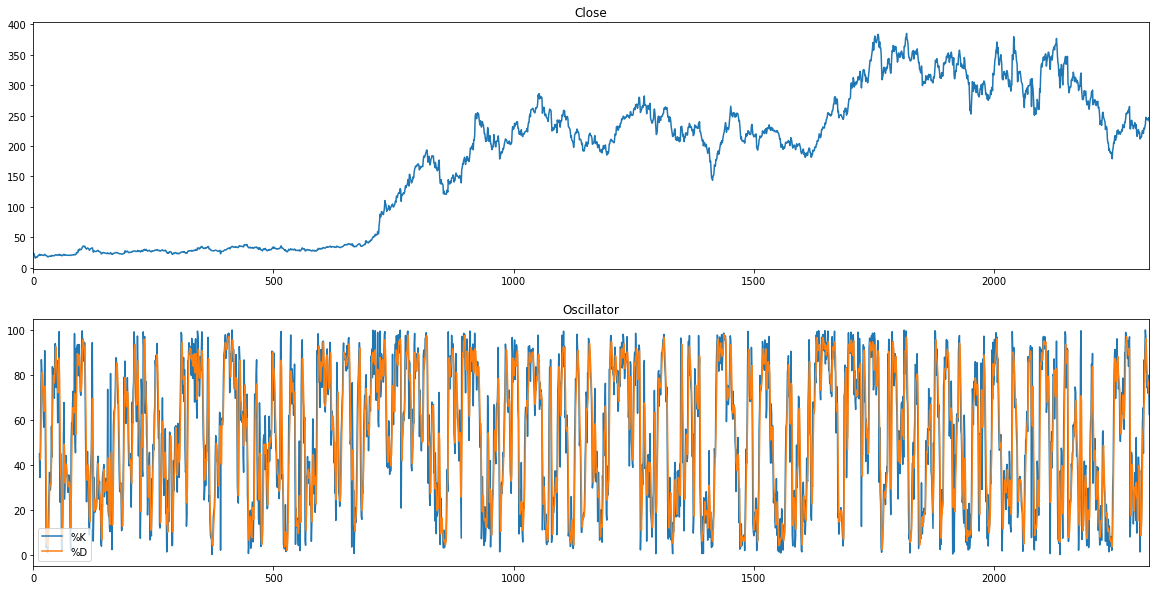

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))

stock_data['Close'].plot(ax=axes[0]); axes[0].set_title('Close')
stock_data[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')